In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../data/winequality-red.csv")

A quick way to show pair-wise correlations among columns

In [4]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

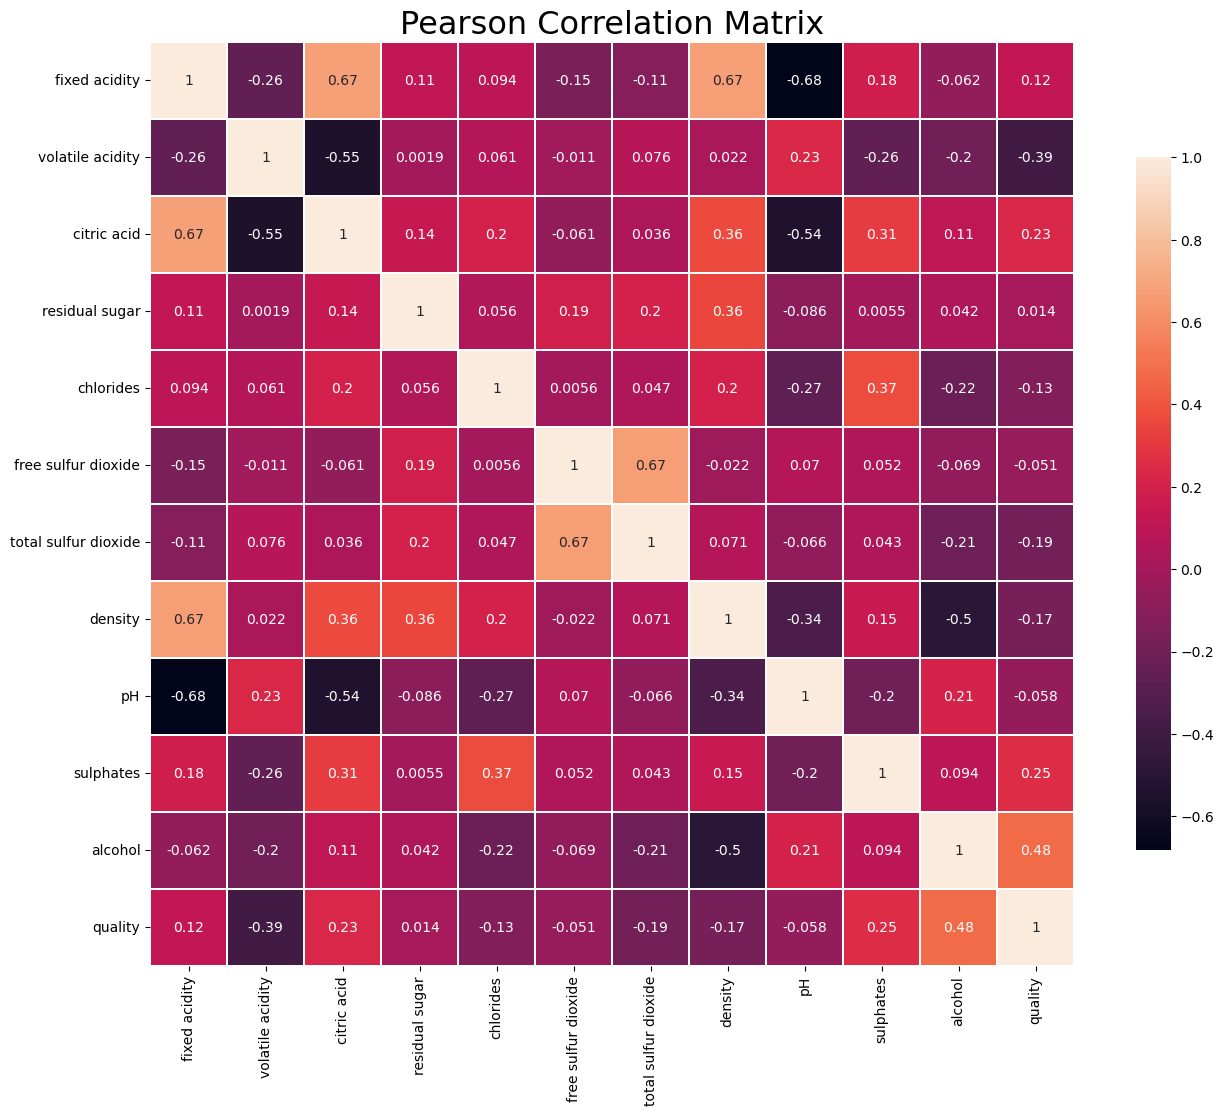

In [5]:
plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=23)

sns.heatmap(df.corr(),linewidths=0.25, vmax=1.0, square=True,
            linecolor='w', annot=True, cbar_kws={"shrink": .75})


A lot of columns are highly correlated. For example, pH with fixed acidity, citric acid; free sulfur dioxide with total sulfure dioxide

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [7]:
from sklearn.decomposition import PCA


In [8]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
new_components = pca.transform(df_scaled)


Text(0, 0.5, 'PC2')

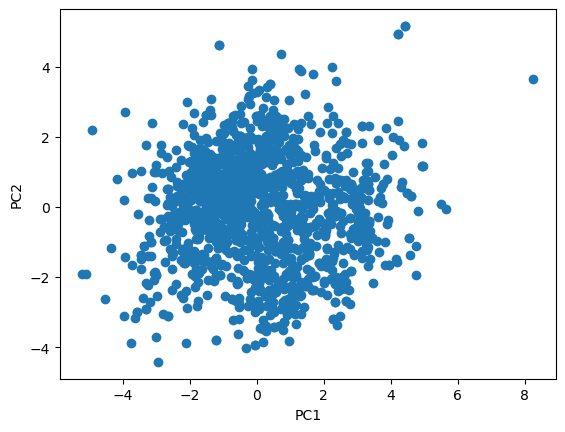

In [9]:
plt.scatter(new_components[:,0],new_components[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [10]:
pca.explained_variance_

array([3.12312087, 2.24328497])

In [11]:
pca.explained_variance_ratio_

array([0.26009731, 0.1868235 ])

The new coordination system has kept about 45% of variance (information)

In [12]:
pca_feature_explainability = pd.DataFrame(pca.components_.transpose(), 
                                          columns=['component_1', 'component_2'],
                                          index=df.columns)

In [13]:
pca_feature_explainability

,component_1,component_2
fixed acidity,0.487883,-0.004173
volatile acidity,-0.265129,0.338968
citric acid,0.473335,-0.137358
residual sugar,0.139154,0.167736
chlorides,0.197427,0.189788
free sulfur dioxide,-0.045881,0.259483
total sulfur dioxide,0.004067,0.363971
density,0.370301,0.330781
pH,-0.432721,-0.065440
sulphates,0.254535,-0.109334
